In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from utils.experiments_functions import get_img_info_simple
import utils.noise_generator as noise_gen
import utils.utils as utils_functions

## Generate data

In [ ]:
# Reads 1 image from each class
images_path = f'data/Sintorn/hardware'
rot = 'r000'
seg = 's001'
images_filenames = []
for file in os.listdir(images_path):
    if file.endswith(f"{rot}-{seg}.png"):
        images_filenames.append(file)
print(len(images_filenames))
print(images_filenames)

25
['canesugar01-r000-s001.png', 'canvas01-r000-s001.png', 'couscous01-r000-s001.png', 'fabric01-r000-s001.png', 'fabric02-r000-s001.png', 'fabric03-r000-s001.png', 'fabric04-r000-s001.png', 'fabric05-r000-s001.png', 'flaxseed01-r000-s001.png', 'knitwear01-r000-s001.png', 'knitwear02-r000-s001.png', 'knitwear03-r000-s001.png', 'lentils01-r000-s001.png', 'oatmeal01-r000-s001.png', 'pearlsugar01-r000-s001.png', 'rice01-r000-s001.png', 'rug01-r000-s001.png', 'ryeflakes01-r000-s001.png', 'seeds01-r000-s001.png', 'seeds02-r000-s001.png', 'sprinkles01-r000-s001.png', 'tile01-r000-s001.png', 'towel01-r000-s001.png', 'wheat01-r000-s001.png', 'wool01-r000-s001.png']


In [4]:
# Sintorn images
all_images = {}

# Display the images
for i, filename in enumerate(images_filenames):
    print(f'Processing image {i+1}/{len(images_filenames)}: {filename}')
    # Reads image
    gs_image = cv2.imread(f'{images_path}/{filename}', cv2.IMREAD_GRAYSCALE)
    gs_image = utils_functions.normalize_uint8_to_float64(gs_image)
    
    # Adds image to the all_images dictionary
    item = filename.split('.')[0]
    if item not in all_images:
        all_images[item] = gs_image

Processing image 1/25: canesugar01-r000-s001.png
Processing image 2/25: canvas01-r000-s001.png
Processing image 3/25: couscous01-r000-s001.png
Processing image 4/25: fabric01-r000-s001.png
Processing image 5/25: fabric02-r000-s001.png
Processing image 6/25: fabric03-r000-s001.png
Processing image 7/25: fabric04-r000-s001.png
Processing image 8/25: fabric05-r000-s001.png
Processing image 9/25: flaxseed01-r000-s001.png
Processing image 10/25: knitwear01-r000-s001.png
Processing image 11/25: knitwear02-r000-s001.png
Processing image 12/25: knitwear03-r000-s001.png
Processing image 13/25: lentils01-r000-s001.png
Processing image 14/25: oatmeal01-r000-s001.png
Processing image 15/25: pearlsugar01-r000-s001.png
Processing image 16/25: rice01-r000-s001.png
Processing image 17/25: rug01-r000-s001.png
Processing image 18/25: ryeflakes01-r000-s001.png
Processing image 19/25: seeds01-r000-s001.png
Processing image 20/25: seeds02-r000-s001.png
Processing image 21/25: sprinkles01-r000-s001.png
Proc

In [5]:
# Process all images
noise_types = ['original', 'salt_and_pepper', 'speckle', 'gaussian', 'poisson']

# sets the probabilities used
noise_param_sp = [0.15, 0.25, 0.4, 0.5] # salt and pepper
noise_param_gaussian = [0.1, 0.3, 0.8, 1.  ] # gaussian
noise_param_speckle = [0.2, 0.6, 1., 1.5 ] # speckle
noise_param_poisson = [0.5, 1.0, 6.0, 20.0] # poisson

image_data_list = []
for i, item in enumerate(all_images):
    print(f"Processing image {i+1}/{len(all_images)}: {item}")
    # get image
    gs_image = all_images[item]
    img_filename = item
    # extract metrics
    print("\tExtracting data")
    image_data = get_img_info_simple(gs_image)
    # add the information
    image_data['image_name'] = img_filename
    image_data['noise_type'] = 'original'
    image_data['noise_param'] = 0
    image_data_list.append(image_data)
    # adds no noise information to each noise_type
    for n_type in noise_types:
        if n_type != 'original':
            # adds the information
            image_data = image_data.copy()
            image_data['noise_type'] = n_type
            image_data_list.append(image_data)

    # adds s&p noise
    print("\tAdding S&P noise")
    for prob in noise_param_sp:
        print(f"\t\tProbability = {prob}")
        # generate noise image
        print("\t\tGenerating noised image")
        noised_image = noise_gen.add_sp_noise(gs_image, prob, prob)
        # extract metrics
        print("\t\tExtracting data")
        noised_image_data = get_img_info_simple(noised_image)
        # add the information
        noised_image_data['image_name'] = img_filename
        noised_image_data['noise_type'] = 'salt_and_pepper'
        noised_image_data['noise_param'] = prob
        image_data_list.append(noised_image_data)
    # adds gaussian noise
    print("\tAdding Gaussian noise")
    for param in noise_param_gaussian:
        print(f"\t\tSigma = {param}")
        # generate noise image
        print("\t\tGenerating noised image")
        noised_image = noise_gen.add_gaussian_noise(image=gs_image, mean=0, sigma=param)
        # extract metrics
        print("\t\tExtracting data")
        noised_image_data = get_img_info_simple(noised_image)
        # add the information
        noised_image_data['image_name'] = img_filename
        noised_image_data['noise_type'] = 'gaussian'
        noised_image_data['noise_param'] = param
        image_data_list.append(noised_image_data)
    # adds speckle noise
    print("\tAdding Speckle noise")
    for param in noise_param_speckle:
        print(f"\t\tSigma = {param}")
        # generate noise image
        print("\t\tGenerating noised image")
        noised_image = noise_gen.add_speckle_noise(gs_image, mean=0, sigma=param)
        # extract metrics
        print("\t\tExtracting data")
        noised_image_data = get_img_info_simple(noised_image)
        # add the information
        noised_image_data['image_name'] = img_filename
        noised_image_data['noise_type'] = 'speckle'
        noised_image_data['noise_param'] = param
        image_data_list.append(noised_image_data)
    # adds poisson noise
    print("\tAdding Poisson noise")
    for factor in noise_param_poisson:
        print(f"\t\tFactor = {factor}")
        # generate noise image
        print("\t\tGenerating noised image")
        noised_image = noise_gen.add_poisson_noise_normalized(gs_image, factor)
        # extract metrics
        print("\t\tExtracting data")
        noised_image_data = get_img_info_simple(noised_image)
        # add the information
        noised_image_data['image_name'] = img_filename
        noised_image_data['noise_type'] = 'poisson'
        noised_image_data['noise_param'] = factor
        image_data_list.append(noised_image_data)

Processing image 1/25: canesugar01-r000-s001
	Extracting data
	Adding S&P noise
		Probability = 0.15
		Generating noised image
		Extracting data
		Probability = 0.25
		Generating noised image
		Extracting data
		Probability = 0.4
		Generating noised image
		Extracting data
		Probability = 0.5
		Generating noised image
		Extracting data
	Adding Gaussian noise
		Sigma = 0.1
		Generating noised image
		Extracting data
		Sigma = 0.3
		Generating noised image
		Extracting data
		Sigma = 0.8
		Generating noised image
		Extracting data
		Sigma = 1.0
		Generating noised image
		Extracting data
	Adding Speckle noise
		Sigma = 0.2
		Generating noised image
		Extracting data
		Sigma = 0.6
		Generating noised image
		Extracting data
		Sigma = 1.0
		Generating noised image
		Extracting data
		Sigma = 1.5
		Generating noised image
		Extracting data
	Adding Poisson noise
		Factor = 0.5
		Generating noised image
		Extracting data
		Factor = 1.0
		Generating noised image
		Extracting data
		Factor = 6.

In [6]:
data_default_aux = pd.concat(image_data_list, ignore_index=True)
data_default_aux.to_csv(f"results/qualificacao_noises/sintorn_noises/sintorn_noises.csv", index=False)

## Plot

In [8]:
images_data = pd.read_csv(f"results/qualificacao_noises/sintorn_noises/sintorn_noises.csv")
images_data.head(10)

,Smoothness,Curve structure,Entropy,Complexity,image_name,noise_type,noise_param
0,0.230972,0.193908,0.932321,0.084523,canesugar01-r000-s001,original,0.00
1,0.230972,0.193908,0.932321,0.084523,canesugar01-r000-s001,salt_and_pepper,0.00
2,0.230972,0.193908,0.932321,0.084523,canesugar01-r000-s001,speckle,0.00
3,0.230972,0.193908,0.932321,0.084523,canesugar01-r000-s001,gaussian,0.00
4,0.230972,0.193908,0.932321,0.084523,canesugar01-r000-s001,poisson,0.00
5,0.043280,0.111536,0.981964,0.022873,canesugar01-r000-s001,salt_and_pepper,0.15
6,0.011998,0.053753,0.966185,0.043591,canesugar01-r000-s001,salt_and_pepper,0.25
7,0.063702,0.025135,0.877806,0.143809,canesugar01-r000-s001,salt_and_pepper,0.40
8,0.171072,0.004098,0.712642,0.287117,canesugar01-r000-s001,salt_and_pepper,0.50
9,0.047993,0.059695,0.997370,0.003471,canesugar01-r000-s001,gaussian,0.10


In [9]:
# Rename 'noise_param' column to 'param'
images_data = images_data.rename(columns={'noise_param': 'param'})

# Display the first few rows to confirm the change
images_data.head()

,Smoothness,Curve structure,Entropy,Complexity,image_name,noise_type,param
0,0.230972,0.193908,0.932321,0.084523,canesugar01-r000-s001,original,0.0
1,0.230972,0.193908,0.932321,0.084523,canesugar01-r000-s001,salt_and_pepper,0.0
2,0.230972,0.193908,0.932321,0.084523,canesugar01-r000-s001,speckle,0.0
3,0.230972,0.193908,0.932321,0.084523,canesugar01-r000-s001,gaussian,0.0
4,0.230972,0.193908,0.932321,0.084523,canesugar01-r000-s001,poisson,0.0


In [10]:
# For each noise type, print the unique parameter values
noise_types = ['salt_and_pepper', 'speckle', 'gaussian', 'poisson']

print("Parameter values by noise type:")
for noise_type in noise_types:
    # Extract data for this noise type
    noise_data = images_data[images_data['noise_type'] == noise_type]
    # Get unique parameter values, sorted
    unique_params = sorted(noise_data['param'].unique())
    
    print(f"\n{noise_type.replace('_', ' ').title()}:")
    print(unique_params)
    print(f"Number of unique values: {len(unique_params)}")
    
    # Additional statistics
    print(f"Min: {min(unique_params)}, Max: {max(unique_params)}")
    
    # For specific noise types, show parameter ranges that might be of interest
    if noise_type == 'gaussian' or noise_type == 'speckle':
        small_range = [p for p in unique_params if p <= 0.2]
        print(f"Values ≤ 0.2: {small_range}")
    elif noise_type == 'poisson':
        small_range = [p for p in unique_params if p <= 1.0]
        large_range = [p for p in unique_params if p >= 10.0]
        print(f"Values ≤ 1.0: {small_range}")
        print(f"Values ≥ 10.0: {large_range}")

Parameter values by noise type:

Salt And Pepper:
[0.0, 0.15, 0.25, 0.4, 0.5]
Number of unique values: 5
Min: 0.0, Max: 0.5

Speckle:
[0.0, 0.2, 0.6, 1.0, 1.5]
Number of unique values: 5
Min: 0.0, Max: 1.5
Values ≤ 0.2: [0.0, 0.2]

Gaussian:
[0.0, 0.1, 0.3, 0.8, 1.0]
Number of unique values: 5
Min: 0.0, Max: 1.0
Values ≤ 0.2: [0.0, 0.1]

Poisson:
[0.0, 0.5, 1.0, 6.0, 20.0]
Number of unique values: 5
Min: 0.0, Max: 20.0
Values ≤ 1.0: [0.0, 0.5, 1.0]
Values ≥ 10.0: [20.0]


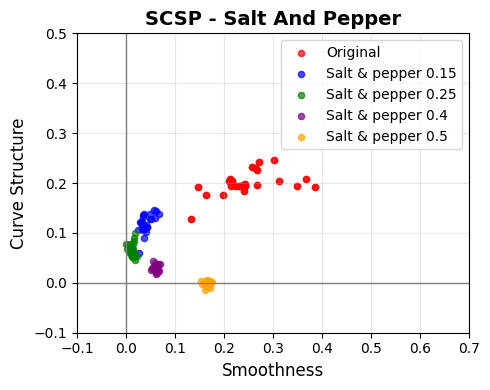

c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:41: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_cont = pd.read_csv(folder_path +'continua-N'+str(N)+'.q1', skiprows=20, sep = '  ')
c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:44: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_troz = pd.read_csv(folder_path +'trozos-N'+str(N)+'.q1', skiprows=20, sep = '  ')


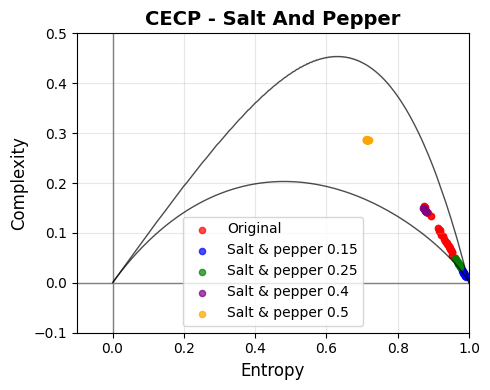

Plots created for salt_and_pepper


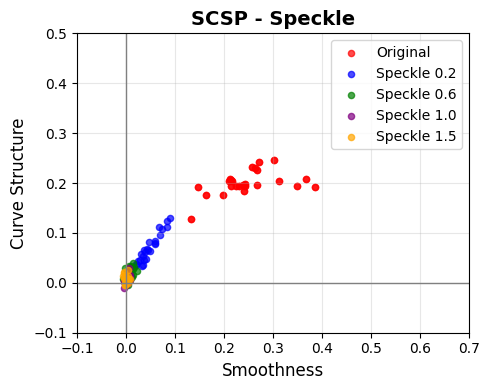

c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:41: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_cont = pd.read_csv(folder_path +'continua-N'+str(N)+'.q1', skiprows=20, sep = '  ')
c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:44: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_troz = pd.read_csv(folder_path +'trozos-N'+str(N)+'.q1', skiprows=20, sep = '  ')


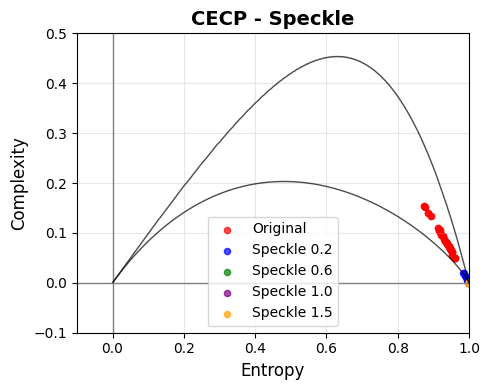

Plots created for speckle


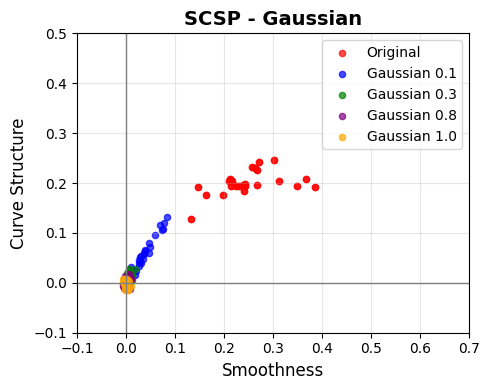

c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:41: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_cont = pd.read_csv(folder_path +'continua-N'+str(N)+'.q1', skiprows=20, sep = '  ')
c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:44: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_troz = pd.read_csv(folder_path +'trozos-N'+str(N)+'.q1', skiprows=20, sep = '  ')


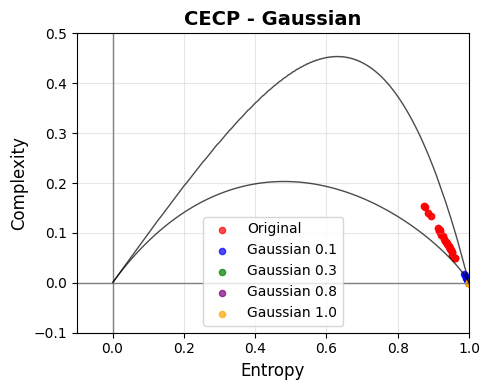

Plots created for gaussian


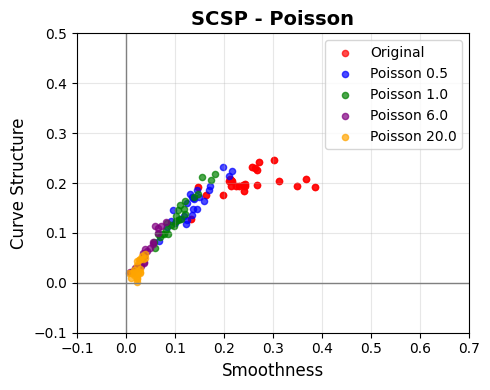

c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:41: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_cont = pd.read_csv(folder_path +'continua-N'+str(N)+'.q1', skiprows=20, sep = '  ')
c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:44: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_troz = pd.read_csv(folder_path +'trozos-N'+str(N)+'.q1', skiprows=20, sep = '  ')


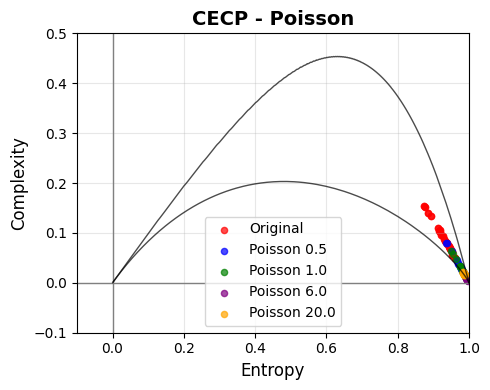

Plots created for poisson


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from utils.utils import read_entropy_complexity_limits

# Define color mapping for each noise parameter (original + 4 noise levels)
param_colors = {
    'original': 'red',
    'param1': 'blue',
    'param2': 'green',
    'param3': 'purple',
    'param4': 'orange'
}

# Define parameter labels for each noise type
param_labels = {
    'salt_and_pepper': {
        'original': 'Original',
        'param1': 'Salt & pepper 0.15',
        'param2': 'Salt & pepper 0.25',
        'param3': 'Salt & pepper 0.4',
        'param4': 'Salt & pepper 0.5'
    },
    'speckle': {
        'original': 'Original',
        'param1': 'Speckle 0.2',
        'param2': 'Speckle 0.6',
        'param3': 'Speckle 1.0',
        'param4': 'Speckle 1.5'
    },
    'gaussian': {
        'original': 'Original',
        'param1': 'Gaussian 0.1',
        'param2': 'Gaussian 0.3',
        'param3': 'Gaussian 0.8',
        'param4': 'Gaussian 1.0'
    },
    'poisson': {
        'original': 'Original',
        'param1': 'Poisson 0.5',
        'param2': 'Poisson 1.0',
        'param3': 'Poisson 6.0',
        'param4': 'Poisson 20.0'
    }
}

# Get parameter values for each noise type
noise_param_values = {
    'salt_and_pepper': [0.0, 0.15, 0.25, 0.4, 0.5],
    'speckle': [0.0, 0.2, 0.6, 1.0, 1.5],
    'gaussian': [0.0, 0.1, 0.3, 0.8, 1.0],
    'poisson': [0.0, 0.5, 1.0, 6.0, 20.0]
}

# Process each noise type
for noise_type in noise_types:
    # Filter data for this noise type
    noise_data = images_data[images_data['noise_type'].isin(['original', noise_type])]
    
    # ===== SCSP Plot (Smoothness vs Curve Structure) =====
    fig_scs, ax_scs = plt.subplots(figsize=(5, 4))
    ax_scs.set_title(f'SCSP - {noise_type.replace("_", " ").title()}', fontsize=14, fontweight='bold')
    ax_scs.set_xlabel('Smoothness', fontsize=12)
    ax_scs.set_ylabel('Curve Structure', fontsize=12)
    ax_scs.grid(True, alpha=0.3)
    ax_scs.axhline(y=0, lw=1, color='gray')
    ax_scs.axvline(x=0, lw=1, color='gray')
    
    # Set fixed limits for consistent viewing
    ax_scs.set_xlim([-0.1, 0.7])
    ax_scs.set_ylim([-0.1, 0.5])
    
    # Create markers for each parameter level
    param_markers = {}
    unique_params = noise_param_values[noise_type]
    
    # Plot points for each image at each parameter level
    unique_images = images_data['image_name'].unique()
    
    for i, param_val in enumerate(unique_params):
        # Get color key
        color_key = 'original' if param_val == 0.0 else f'param{i}'
        color = param_colors[color_key]
        label = param_labels[noise_type][color_key]
        
        # Filter data for this parameter
        if param_val == 0.0:
            # For originals, use either original or noise_type with param=0
            param_data = noise_data[(noise_data['noise_type'] == 'original') | 
                                   ((noise_data['noise_type'] == noise_type) & 
                                    (noise_data['param'] == param_val))]
        else:
            param_data = noise_data[(noise_data['noise_type'] == noise_type) & 
                                   (noise_data['param'] == param_val)]
        
        # Plot points
        scatter = ax_scs.scatter(param_data['Smoothness'], param_data['Curve structure'], 
                                color=color, label=label, alpha=0.7, s=20)
        param_markers[param_val] = scatter
    
    ax_scs.legend(fontsize=10)
    plt.tight_layout()
    plt.savefig(f'results/qualificacao_noises/sintorn_noises/sintorn_{noise_type}_scs_plot.png', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close(fig_scs)
    
    # ===== CECP Plot (Entropy vs Complexity) =====
    fig_cecp, ax_cecp = plt.subplots(figsize=(5, 4))
    ax_cecp.set_title(f'CECP - {noise_type.replace("_", " ").title()}', fontsize=14, fontweight='bold')
    ax_cecp.set_xlabel('Entropy', fontsize=12)
    ax_cecp.set_ylabel('Complexity', fontsize=12)
    ax_cecp.grid(True, alpha=0.3)
    ax_cecp.axhline(y=0, lw=1, color='gray')
    ax_cecp.axvline(x=0, lw=1, color='gray')
    
    # Set fixed limits for CECP
    ax_cecp.set_xlim([-0.1, 1])
    ax_cecp.set_ylim([-0.1, 0.5])
    
    # Add CECP theoretical limits
    df_cont, df_troz = read_entropy_complexity_limits('data/limits/mv/', N=240)
    ax_cecp.plot(df_cont['HT'], df_cont['CJT'], color='black', lw=1, alpha=0.7)
    ax_cecp.plot(df_troz['HT'], df_troz['CJT'], color='black', lw=1, alpha=0.7)
    
    # Plot points for each image at each parameter level
    for i, param_val in enumerate(unique_params):
        # Get color key
        color_key = 'original' if param_val == 0.0 else f'param{i}'
        color = param_colors[color_key]
        label = param_labels[noise_type][color_key]
        
        # Filter data for this parameter
        if param_val == 0.0:
            # For originals, use either original or noise_type with param=0
            param_data = noise_data[(noise_data['noise_type'] == 'original') | 
                                   ((noise_data['noise_type'] == noise_type) & 
                                    (noise_data['param'] == param_val))]
        else:
            param_data = noise_data[(noise_data['noise_type'] == noise_type) & 
                                   (noise_data['param'] == param_val)]
        
        # Plot points
        scatter = ax_cecp.scatter(param_data['Entropy'], param_data['Complexity'], 
                                 color=color, label=label, alpha=0.7, s=20)
    
    ax_cecp.legend(fontsize=10)
    plt.tight_layout()
    plt.savefig(f'results/qualificacao_noises/sintorn_noises/sintorn_{noise_type}_cecp_plot.png', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close(fig_cecp)
    
    print(f"Plots created for {noise_type}")
